# OroraTech Data Analyst

The project analyzes wildfire in Lai Chau - a state of Vietnam - a South East Asia Country. Lai Chau, where wildfires normally occur during dry weather, in addition to complicated climate changes, a large accumulation of combusible materials. (40 km x 40 km)

The analyzed area is 40x40 km and timespan is from January 2019 to December 2019. The period of time should include at least 3-5 year to make the stronger conclusion but because the dataset is considerably heavy to load into the system, therefore one year period was used to analyze. 

Two Hypotheses are proposed to test in the project: 
- 1. The wildfire in Vietnam occur often in dry season (from March to August) yearly
- 2. Most of wildfire cases in Vietnam happen in small scale which are under well control and do not last long

In [16]:
#Import librabries
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from pylab import *
from mpl_toolkits.basemap import Basemap

In [17]:
#load datas
ds = xr.open_mfdataset('..//WILDFIRE-DATA-ANALYSIS//data//*2019.nc')
print(ds)


<xarray.Dataset>
Dimensions:                          (time: 12, lat: 720, lon: 1440,
                                      vegetation_class: 18, bounds: 2)
Coordinates:
  * lat                              (lat) float64 89.88 89.62 ... -89.62 -89.88
  * lon                              (lon) float64 -179.9 -179.6 ... 179.6 179.9
  * time                             (time) datetime64[ns] 2019-01-01 ... 201...
  * vegetation_class                 (vegetation_class) int32 -2147483647 ......
Dimensions without coordinates: bounds
Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta

In [18]:
#List of variables
ds.data_vars

Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    number_of_patches                (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burned_area_in_vegetation_class  (time, vegetation_class, lat, lon) float32 dask.array<chunksize=(1, 18, 720, 1440), meta=np.ndarray>
    lat_bounds                       (time, lat, bounds) float64 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bounds                       (time, lon, bounds) float64 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    time_bounds                  

Based on two hypotheses, "burned area" and "vegetation_class_name" are variables chosed to be analyzed. 
First we extract the location by Lattitude and Longitude of Lai Chau

In [19]:
#Extract the location
latbounds = [22.464,22.123]
lonbounds = [102.377,102.809]

#### Hypothesis number 1: Most of the wildfire in Vietnam occur in dry season, mostly from March to August.

First, look at detail of variable

In [20]:
ds.burned_area

<xarray.DataArray 'burned_area' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:      total burned_area
    units:          m2
    standard_name:  burned_area
    cell_methods:   time: sum

Get information in Lai Chau area

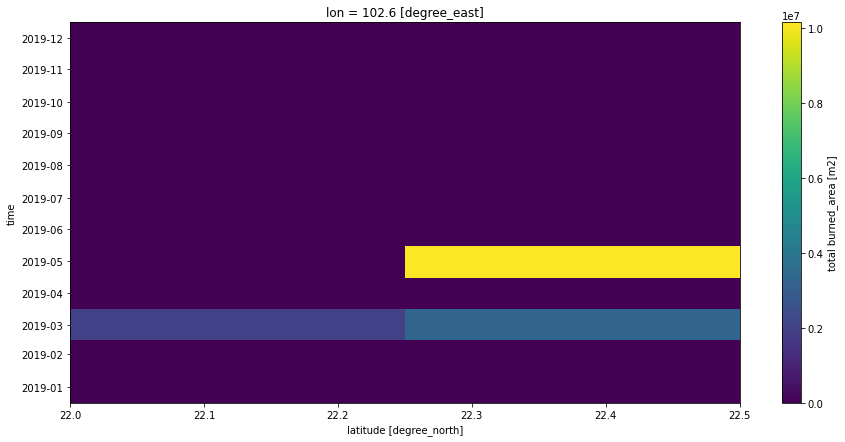

In [21]:
total_bunred_area_vs_time  = ds.burned_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
plt.figure(figsize = (15,7))
total_bunred_area_vs_time.plot()

There are two wildfire in LaiChau in 2019, first is in March with 2 square kilometers, second is 10 km2 in May

Let choose another popular location about wildfire in Vietnam, which is in the middle of Vietnam: Quang Nam - Quang Ngai

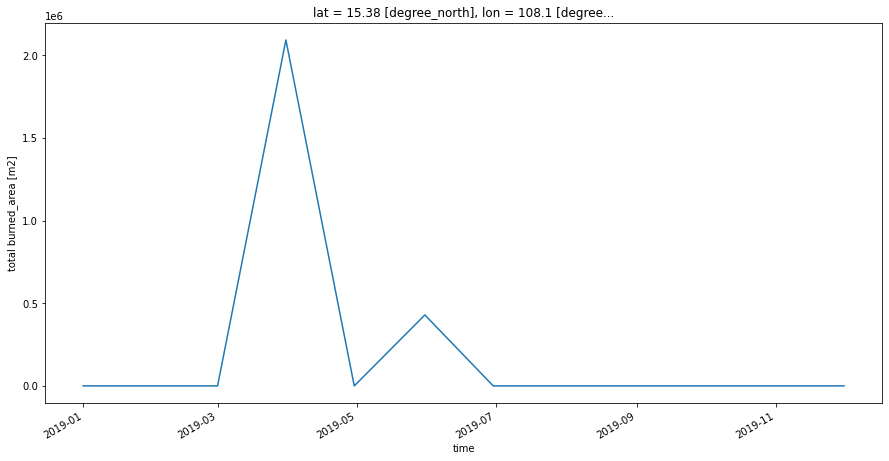

In [22]:
latbounds1 = [15.603,15.128]
lonbounds1 = [107.930,108.347]
total_bunred_area_vs_time1  = ds.burned_area.sel(lat=slice(*latbounds1), lon=slice(*lonbounds1))
plt.figure(figsize = (15,7))
total_bunred_area_vs_time1.plot()

In the middle of the country, most of wildfire happened after March until the end of July

By check in two areas. I conclude that the hypothesis the wildfire normally happened in dry weather, specific from March to August is totally precise. 

#### Hypothesis 2: Most of wildfire cases in Vietnam happen in small scale which are under well control and do not last long

In [23]:
ds.fraction_of_burnable_area

<xarray.DataArray 'fraction_of_burnable_area' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  fraction of burnable area
    units:      1
    comment:    The fraction of burnable area is the fraction of the cell tha...

In [24]:
burned_area_in_vegetation_class_vs_time =  ds.burned_area_in_vegetation_class.sel(lat=slice(*latbounds), lon=slice(*lonbounds))

(array([419.,   5.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([      0.,  311255.,  622510.,  933765., 1245020., 1556275.,
        1867530., 2178785., 2490040., 2801295., 3112550.], dtype=float32),
 <BarContainer object of 10 artists>)

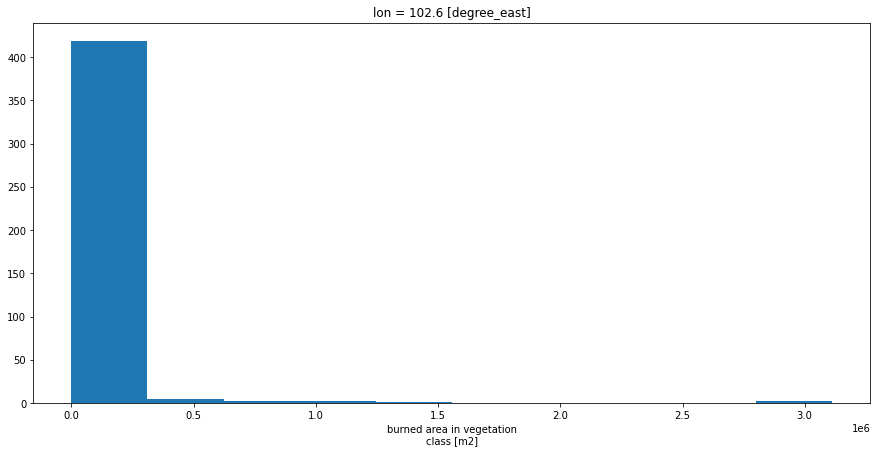

In [25]:
plt.figure(figsize = (15,7))
burned_area_in_vegetation_class_vs_time.plot()

In [26]:
bg = burned_area_in_vegetation_class_vs_time.to_dataframe()
print(bg.count())
print(bg[bg>2].count())
print(bg[bg<5].count())

burned_area_in_vegetation_class    432
dtype: int64
burned_area_in_vegetation_class    18
dtype: int64
burned_area_in_vegetation_class    414
dtype: int64


The area of ​​forest fire in the area is only under 500 thousand square meters (414 cases - 95%). There is 18 cases (4%) which fired areas up to 3 km2

Therefore we can see that most of wildfire cases in Lai Chau do not in large dimension and normally under well control. 

About the vegetation_class analysis should be made clearlier if the dataset about vegetation class are loaded successfully but unfortunately the file is to big to make the load. 

### Conclussion:

The cause of the forest fire was confirmed to be due to the dry weather which mostly happen from March to August,in addition to the complicated climate change.
The fire area is mainly planted and regenerated forests. This is a complex place, mainly high mountains and steep slopes, no water source and far from population, so it is difficult to detect a newly started fire. Another reason is that people's awareness in forest protection is still limited, people burn their fields for farming without making runways to stop the fire, so the fire cannot be controlled. causing widespread forest fires in recent years. 